In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imblearn.under_sampling import NearMiss
df = pd.read_csv('../data/train_users_2.csv')
print df.shape

(213451, 15)


## replace all number and drop NaN

In [73]:
# replace all unknown data with non
df.replace('-unknown-', np.nan, inplace=True)

df = df.dropna()
#drop all nan data

df.shape

(97979, 15)

In [74]:
gender_relat_data = df

In [75]:
gender_relat_data.shape

(97979, 15)

# under sampling age 30

In [5]:

#30 data for under sampling
thir_X = gender_relat_data
#other data for upsampling
thir_Y = thir_X.gender
thir_X.drop(['id','gender','date_account_created','country_destination'],1,inplace=True)
thir_X.shape

(97979, 11)

In [6]:
# thir_X.head(5)

In [7]:
oh_signup_method = pd.get_dummies(thir_X.signup_method, prefix="signup_method")
oh_language = pd.get_dummies(thir_X.language, prefix="language")
oh_signup_flow = pd.get_dummies(thir_X.signup_flow, prefix="signup_flow")
oh_affiliate_channel = pd.get_dummies(thir_X.affiliate_channel, prefix="affiliate_channel")
oh_affiliate_provider = pd.get_dummies(thir_X.affiliate_provider, prefix="affiliate_provider")
oh_first_affiliate_tracked = pd.get_dummies(thir_X.first_affiliate_tracked, prefix="first_affiliate_tracked")
oh_signup_app = pd.get_dummies(thir_X.signup_app, prefix="signup_app")
oh_first_device_type = pd.get_dummies(thir_X.first_device_type, prefix="first_device_type")
oh_first_browser = pd.get_dummies(thir_X.first_browser, prefix="first_browser")
thir_X.drop(['signup_method','language', 'signup_flow',
          'affiliate_channel', 
         'affiliate_provider', 'first_affiliate_tracked', 
         'signup_app', 'first_device_type', 'first_browser'],1,inplace=True)
thir_X.shape
thir_X = pd.concat([thir_X,oh_signup_method,oh_language,
                    oh_affiliate_channel,oh_affiliate_provider,
                    oh_first_affiliate_tracked,oh_first_browser],axis=1)


In [8]:
thir_X.shape

(97979, 102)

In [9]:
nm1 = NearMiss(ratio={'MALE':44942, 'FEMALE':44942},random_state=4, version =2)
Xthir_resample,Ythir_resample = nm1.fit_sample(thir_X,thir_Y)
Ythir_resample.shape

(90093,)

In [10]:
df_xthir = pd.DataFrame(Xthir_resample)
df_ythir = pd.DataFrame(Ythir_resample,columns = ['gender'])
#df_ythir['gender'].value_counts()
df_other = pd.concat([df_xthir,df_ythir],axis=1)
df_other.shape

(90093, 103)

In [11]:
# df_other.head(5)

# over sampling male in other ages

In [76]:
gender_relat_data.shape
other_Y = gender_relat_data.gender

gender_relat_data.drop(['id','gender','date_account_created','country_destination'],1,inplace=True)


In [77]:
gender_relat_data.shape

(97979, 11)

In [78]:
oh_signup_method = pd.get_dummies(gender_relat_data.signup_method, prefix="signup_method")
oh_language = pd.get_dummies(gender_relat_data.language, prefix="language")
oh_affiliate_channel = pd.get_dummies(gender_relat_data.affiliate_channel, prefix="affiliate_channel")
oh_affiliate_provider = pd.get_dummies(gender_relat_data.affiliate_provider, prefix="affiliate_provider")
oh_first_affiliate_tracked = pd.get_dummies(gender_relat_data.first_affiliate_tracked, prefix="first_affiliate_tracked")
#oh_signup_app = pd.get_dummies(gender_relat_data.signup_app, prefix="signup_app")
#oh_first_device_type = pd.get_dummies(gender_relat_data.first_device_type, prefix="first_device_type")
oh_first_browser = pd.get_dummies(gender_relat_data.first_browser, prefix="first_browser")
gender_relat_data.drop(['signup_method', 'signup_method', 'signup_flow',
         'language', 'affiliate_channel', 
         'affiliate_provider', 'first_affiliate_tracked', 
         'signup_app', 'first_device_type', 'first_browser'],1,inplace=True)
gender_relat_data.shape
gender_relat_data = pd.concat([gender_relat_data,oh_signup_method,oh_language,
                    oh_affiliate_channel,oh_affiliate_provider,
                    oh_first_affiliate_tracked,oh_first_browser],axis=1)

In [79]:
other_X = gender_relat_data

In [80]:
from imblearn.over_sampling import SMOTE


In [81]:
other_Y.value_counts()

FEMALE    52828
MALE      44942
OTHER       209
Name: gender, dtype: int64

In [82]:
sm = SMOTE({'FEMALE':52828,'MALE':52828,'OTHER':209},kind='borderline2')
Xother_resamp,Yother_resamp = sm.fit_sample(other_X,other_Y)

In [83]:
df_yother = pd.DataFrame(Yother_resamp,columns = ['gender'])
df_yother.shape

(105864, 1)

In [84]:
df_yother = pd.DataFrame(Yother_resamp,columns = ['gender'])
df_yother['gender'].value_counts()

FEMALE    52828
MALE      52827
OTHER       209
Name: gender, dtype: int64

In [85]:
df_xother = pd.DataFrame(Xother_resamp)

In [86]:
df_other = pd.concat([df_xother,df_yother],axis=1)
df_other.shape

(105864, 103)

## merge other and 30 age group

In [36]:
# df_whole =  pd.concat([df_other,df_thir],axis=0)
# df_whole.shape

(154854, 107)

In [37]:
# df_whole['gender'].value_counts()

MALE      77286
FEMALE    77286
OTHER       282
Name: gender, dtype: int64

In [38]:
# df_whole = df_whole.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [39]:
# from sklearn.utils import shuffle
# df_whole = shuffle(df_whole)

# seperate features and samples

In [87]:
df_whole_Y = df_other['gender']

In [88]:
df_other.drop(['gender'],1,inplace=True)

In [89]:
df_whole_X = df_other

In [90]:
df_whole_X.head(3)

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,2.010000e+13,38.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.010000e+13,56.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.010000e+13,42.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_whole_X, df_whole_Y, test_size=0.3)

## DECISION TREE TO PREDICT GENDER

In [99]:
from sklearn import tree
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
import seaborn as sn
result_lable = ['MALE','FEMALE','OTHER']

clf = tree.DecisionTreeClassifier(criterion='entropy',min_samples_split=1000)
clf = clf.fit(x_train,y_train)

In [100]:
y_predict = clf.predict(x_test)
precision, recall, fscore, support = score(y_test, y_predict)
print('precision: {}'.format(precision))
print precision_score(y_test, y_predict, average='weighted') 
print accuracy_score(y_test, y_predict)

precision: [ 0.56364819  0.58766063  0.        ]
0.574358828978
0.57370906801


/Users/lixiaochi/anaconda/lib/python2.7/site-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/Users/lixiaochi/anaconda/lib/python2.7/site-packages/seaborn/matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


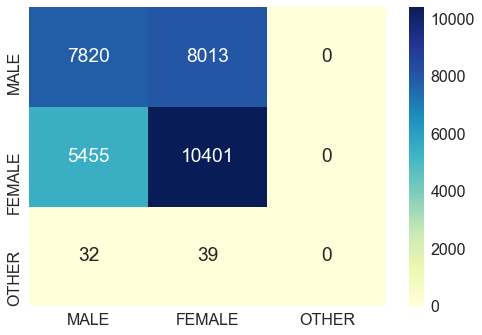

In [101]:
cnf_matrix = confusion_matrix(y_test, y_predict, labels = result_lable)
cnf_matrix = pd.DataFrame(cnf_matrix, index = [i for i in result_lable],
                          columns = [i for i in result_lable])
# Plot non-normalized confusion matrix
sn.set(font_scale=1.6)
sn.heatmap(cnf_matrix, annot= True, cmap="YlGnBu",fmt="d")

## Radial Basis Function (RBF) kernel SVM

In [76]:
from sklearn.svm import SVC
svc = SVC(gamma=2, C=1)
svc.fit(x_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [77]:
y_predict = svc.predict(x_test)
precision, recall, fscore, support = score(y_test, y_predict)
print('precision: {}'.format(precision))
print precision_score(y_test, y_predict, average='weighted') 
print accuracy_score(y_test, y_predict)

precision: [ 0.5340403   0.55711171  0.00614754]
0.544536850499
0.526479848866


/Users/lixiaochi/anaconda/lib/python2.7/site-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/Users/lixiaochi/anaconda/lib/python2.7/site-packages/seaborn/matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


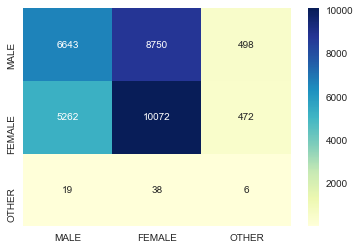

In [78]:
cnf_matrix = confusion_matrix(y_test, y_predict, labels = result_lable)
cnf_matrix = pd.DataFrame(cnf_matrix, index = [i for i in result_lable],
                          columns = [i for i in result_lable])
# Plot non-normalized confusion matrix
sn.set(font_scale=1.6)
sn.heatmap(cnf_matrix, annot= True, cmap="YlGnBu",fmt="d")